In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/',one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


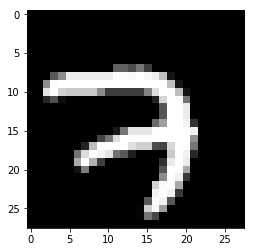

In [4]:
img = mnist.train.images[0].reshape(28,28)
plt.imshow(img,cmap = 'gray')

In [9]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100
keep_prob = 0.7

In [10]:
X = tf.placeholder(tf.float32,[None,784])
X_img = tf.reshape(X,[-1,28,28,1])
Y = tf.placeholder(tf.float32,[None,10])
print(X_img)

Tensor("Reshape_1:0", shape=(?, 28, 28, 1), dtype=float32)


In [11]:
W1 = tf.Variable(tf.random_normal([3,3,1,32],stddev = 0.01))

In [12]:
L1 = tf.nn.conv2d(X_img,W1,strides = [1,1,1,1],padding = 'SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1,ksize=[1,2,2,1],strides = [1,2,2,1],padding = 'SAME')
L1 = tf.nn.dropout(L1,keep_prob = keep_prob )

In [14]:
W2 = tf.Variable(tf.random_normal([3,3,32,64],stddev = 0.01))
L2 = tf.nn.conv2d(L1,W2,strides = [1,1,1,1],padding = 'SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2,ksize = [1,2,2,1],strides = [1,2,2,1],padding = 'SAME')
L2 = tf.nn.dropout(L2,keep_prob = keep_prob)

In [15]:
W3 = tf.Variable(tf.random_normal([3,3,64,128],stddev = 0.01))
L3 = tf.nn.conv2d(L2,W3,strides = [1,1,1,1],padding = 'SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3,ksize = [1,2,2,1],strides = [1,2,2,1],padding = 'SAME')
L3 = tf.nn.dropout(L3,keep_prob = keep_prob)
L3 = tf.reshape(L3,[-1,128*4*4])





In [16]:
W4 = tf.get_variable('W4',shape = [128*4*4,625],initializer = tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3,W4)+b4)
L4 = tf.nn.dropout(L4,keep_prob = keep_prob)

In [17]:
W5 = tf.get_variable('W5',shape = [625,10],initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4,W5)+b5

In [18]:
#define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis,labels = Y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

In [19]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())
print('Learning started. it takes time')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples/ batch_size)
    for i in range(total_batch):
        batch_xs,batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X:batch_xs,Y:batch_ys}
        c,_, = sess.run([cost,optimizer],feed_dict = feed_dict)
        avg_cost+=c/total_batch
    print('Epoch:','%04d' %(epoch + 1), 'cost=','{:.9f}'.format(avg_cost))
print('Learning finished')

correct_prediction = tf.equal(tf.argmax(hypothesis,1),tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
print('Accuracy:',sess.run(accuracy,feed_dict = {X:mnist.test.images,Y:mnist.test.labels}))

Learning started. it takes time
Epoch: 0001 cost= 0.411435915
Epoch: 0002 cost= 0.095680304
Epoch: 0003 cost= 0.073361707
Epoch: 0004 cost= 0.061846806
Epoch: 0005 cost= 0.052525794
Epoch: 0006 cost= 0.046330150
Epoch: 0007 cost= 0.042987988
Epoch: 0008 cost= 0.039844610
Epoch: 0009 cost= 0.034817414
Epoch: 0010 cost= 0.034360962
Epoch: 0011 cost= 0.031870702
Epoch: 0012 cost= 0.030558558
Epoch: 0013 cost= 0.028898785
Epoch: 0014 cost= 0.029261348
Epoch: 0015 cost= 0.026681488
Learning finished
Accuracy: 0.987
